# 2T_크롤링 고급_pagination, url builder

##### 네이버 블로그 페이지 크롤링

In [1]:
import requests

In [2]:
response = requests.get("http://naver.com")

In [3]:
import time
import random

In [4]:
#이거 실행하면 계속 갑니다. 랜덤으로 크롤링 하는 것
# for page_id in range(1, 100):
#     sleeping = random.randint(30, 100)
#     print(str(page_id) + "를 크롤링합니다.")
#     time.sleep(sleeping)

In [5]:
response = requests.get("http://search.naver.com/search.naver?sm=tab_hty.top&where=post&ie=utf8&query=%EC%95%84%EC%9D%B4%EC%98%A4%EC%95%84%EC%9D%B4+%EA%B0%95%EB%AF%B8%EB%82%98")

In [6]:
response

<Response [200]>

In [7]:
response.text

'<!doctype html> <html class="" lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="아이오아이 강미나 : 네이버 블로그검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'아이오아이 강미나\'의 네이버 블로그검색 결과입니다."> <meta name="description" lang="ko" content="\'아이오아이 강미나\'의 네이버 블로그검색 결과입니다."> <title>아이오아이 강미나 : 네이버 블로그검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/2016/css/search1_0804.css"> <link 

In [8]:
for page_num in range(1, 100):
    start = (page_num - 1) * 10 + 1
    BASE_URL = "http://naver.com/search?query=강미나&start=" + str(start)
    print(BASE_URL)

http://naver.com/search?query=강미나&start=1
http://naver.com/search?query=강미나&start=11
http://naver.com/search?query=강미나&start=21
http://naver.com/search?query=강미나&start=31
http://naver.com/search?query=강미나&start=41
http://naver.com/search?query=강미나&start=51
http://naver.com/search?query=강미나&start=61
http://naver.com/search?query=강미나&start=71
http://naver.com/search?query=강미나&start=81
http://naver.com/search?query=강미나&start=91
http://naver.com/search?query=강미나&start=101
http://naver.com/search?query=강미나&start=111
http://naver.com/search?query=강미나&start=121
http://naver.com/search?query=강미나&start=131
http://naver.com/search?query=강미나&start=141
http://naver.com/search?query=강미나&start=151
http://naver.com/search?query=강미나&start=161
http://naver.com/search?query=강미나&start=171
http://naver.com/search?query=강미나&start=181
http://naver.com/search?query=강미나&start=191
http://naver.com/search?query=강미나&start=201
http://naver.com/search?query=강미나&start=211
http://naver.com/search?query=강미나&start=221

#### 이번에는 직방의 경우

In [9]:
#https://api.zigbang.com/v1/items?detail=true&item_ids=4461545
# 100001 - 101000 ( 1000개 )
# requests 를 10번만 보내기 => 즉 1000번 => 100번 * 10회

In [10]:
import json

In [11]:
# 1번째, 100001 => 100100 ( 100개 )
# 2번째, 100101 => 100200 ( 100개 )
# 3번쨰, 100201 => 100300 ( 100개 )
# ...

In [12]:
import random
a = [
    random.randint(100001, 101000)
    for i
    in range(100)
]
a = list(set(a))   #이렇게 set으로 하면 중복을 없앨 수 있다.

In [13]:
for i in range(10):
    start_room_id = 100000 + (i * 100) + 1
    end_room_id = 100000 + ((i + 1) * 100)
    # print((start_room_id, end_room_id))
    
    BASE_URL = "https://api.zigbang.com/v1/items?detail=true"
    result_url = BASE_URL + "&item_ids=" + "&item_ids=".join([
        str(room_id)
        for room_id
        in range(start_room_id, end_room_id + 1)
    ])

#     for room_id in range(start_room_id, end_room_id + 1):
#         result_url = result_url + "&item_ids=" + str(room_id)

#     api.zigbang.com/v1/items?detail=true&item_ids=3430448&item_ids=3367854&item_ids=3288446&item_ids=3467204&item_ids=3150497&item_ids=3440906&item_ids=3376834&item_ids=3139708&item_ids=3331511&item_ids=3373198&item_ids=3236734&item_ids=3376434&item_ids=3322860&item_ids=3303061&item_ids=3287167&item_ids=3262172&item_ids=3228631&item_ids=3505011&item_ids=3249401&item_ids=3330951&item_ids=3494055&item_ids=3317227&item_ids=3405679&item_ids=3103384&item_ids=3418616&item_ids=3240028&item_ids=3456814&item_ids=3416910&item_ids=3429455&item_ids=3181675&item_ids=3309372&item_ids=3501566&item_ids=3240513&item_ids=3346510&item_ids=3406670&item_ids=3412596&item_ids=3214438&item_ids=3459715&item_ids=3493254&item_ids=3475114&item_ids=3501607&item_ids=3484623&item_ids=3190410&item_ids=3350050&item_ids=3495453&item_ids=3446619&item_ids=3451078&item_ids=3248718&item_ids=3345445&item_ids=3332380&item_ids=3450803&item_ids=3471049&item_ids=3438747&item_ids=3330749&item_ids=3446920&item_ids=3151682&item_ids=3501554&item_ids=3258532&item_ids=3435418&item_ids=3501551

print(result_url)

https://api.zigbang.com/v1/items?detail=true&item_ids=100901&item_ids=100902&item_ids=100903&item_ids=100904&item_ids=100905&item_ids=100906&item_ids=100907&item_ids=100908&item_ids=100909&item_ids=100910&item_ids=100911&item_ids=100912&item_ids=100913&item_ids=100914&item_ids=100915&item_ids=100916&item_ids=100917&item_ids=100918&item_ids=100919&item_ids=100920&item_ids=100921&item_ids=100922&item_ids=100923&item_ids=100924&item_ids=100925&item_ids=100926&item_ids=100927&item_ids=100928&item_ids=100929&item_ids=100930&item_ids=100931&item_ids=100932&item_ids=100933&item_ids=100934&item_ids=100935&item_ids=100936&item_ids=100937&item_ids=100938&item_ids=100939&item_ids=100940&item_ids=100941&item_ids=100942&item_ids=100943&item_ids=100944&item_ids=100945&item_ids=100946&item_ids=100947&item_ids=100948&item_ids=100949&item_ids=100950&item_ids=100951&item_ids=100952&item_ids=100953&item_ids=100954&item_ids=100955&item_ids=100956&item_ids=100957&item_ids=100958&item_ids=100959&item_ids=10

# 4T_데이터 분석 ( Data Science ) 맛보기 - pandas, matplotlib

In [14]:
# pandas - pydata
import pandas as pd

In [15]:
df = pd.DataFrame(columns=["address", "deposit", "rent", "phonenumber"])

In [16]:
df.loc[0] = ['주소', 1000, 100, "01062353317"]

In [17]:
print(df)

  address  deposit   rent  phonenumber
0      주소   1000.0  100.0  01062353317


In [18]:
df.loc[1] = ['주소1', 2000, 100, "01062353317"]

In [19]:
df.loc[2] = ['주소2', 2000, 100, "01062353317"]

In [20]:
len(df)

3

In [21]:
df.loc[len(df)] = ['주소3', 2000, 100, "01062353317"]  #맨 마지막 row에 추가

In [22]:
df.loc[0:3]

,address,deposit,rent,phonenumber
0,주소,1000.0,100.0,01062353317
1,주소1,2000.0,100.0,01062353317
2,주소2,2000.0,100.0,01062353317
3,주소3,2000.0,100.0,01062353317


In [23]:
for i in range(1):
    start_room_id = 100000 + (i * 100) + 1
    end_room_id = 100000 + ((i + 1) * 100)
    # print((start_room_id, end_room_id))
    
    BASE_URL = "https://api.zigbang.com/v1/items?detail=true"
    result_url = BASE_URL + "&item_ids=" + "&item_ids=".join([
        str(room_id)
        for room_id
        in range(start_room_id, end_room_id + 1)
    ])
    
    

def get_df_from_zigbang(url):
    response = requests.get(url)
    zigbang_dict = json.loads(response.text)
    df = pd.DataFrame(columns=["address", "deposit", "rent", "phonenumber"])
    for item in zigbang_dict.get('items'):
        room_information = item.get('item')
        try:
            address = room_information.get('agent_address1')
            deposit = room_information.get('deposit')
            rent = room_information.get('rent')
            phonenumber = room_information.get('original_user_phone')
            df.loc[len(df)] = [address, deposit, rent, phonenumber]
        except:
            pass
        
    return df

In [24]:
# 강남구 신사동 ( df1 )
# 관악구 신림동 ( df2 )
df_shinsa = get_df_from_zigbang("https://api.zigbang.com/v1/items?detail=true&item_ids=5495971&item_ids=5600860&item_ids=5490317&item_ids=5643763&item_ids=5636293&item_ids=5660546&item_ids=5512589&item_ids=5595091&item_ids=5593179&item_ids=5624018&item_ids=5512559&item_ids=5608602&item_ids=5628997&item_ids=5600817&item_ids=5567541&item_ids=5642163&item_ids=5169178&item_ids=5519658&item_ids=5537230&item_ids=5555431&item_ids=5441521&item_ids=5647242&item_ids=5642175&item_ids=5642023&item_ids=5575842&item_ids=5602646&item_ids=5594247&item_ids=5652932&item_ids=5470193&item_ids=5630702&item_ids=5644599&item_ids=5423901&item_ids=5645690&item_ids=5644627&item_ids=5444342&item_ids=5646998&item_ids=5607553&item_ids=5595814&item_ids=5589916&item_ids=5631474&item_ids=5661988&item_ids=5610946&item_ids=5608753&item_ids=5664279&item_ids=5519928&item_ids=5521262&item_ids=5644685&item_ids=5623803&item_ids=5644492&item_ids=5463078&item_ids=5636014&item_ids=5538016&item_ids=5662190&item_ids=5526171&item_ids=5618541&item_ids=5569798&item_ids=5641189&item_ids=5655575&item_ids=5466507&item_ids=5555613")
df_shinlim = get_df_from_zigbang("https://api.zigbang.com/v1/items?detail=true&item_ids=4620292&item_ids=4366382&item_ids=4566963&item_ids=4585208&item_ids=4560308&item_ids=4552724&item_ids=4344484&item_ids=4612042&item_ids=4574810&item_ids=4588687&item_ids=4387287&item_ids=4538842&item_ids=4557985&item_ids=4579464&item_ids=4607349&item_ids=4603203&item_ids=4341393&item_ids=4575315&item_ids=4350877&item_ids=4538375&item_ids=4616443&item_ids=4281504&item_ids=4556024&item_ids=4550034&item_ids=4512172&item_ids=4507118&item_ids=4606156&item_ids=4457169&item_ids=4526327&item_ids=4407071&item_ids=4582264&item_ids=4607937&item_ids=4395275&item_ids=4568603&item_ids=4569329&item_ids=4564865&item_ids=4551098&item_ids=4617261&item_ids=4536918&item_ids=4614718&item_ids=4614198&item_ids=4610604&item_ids=4578711&item_ids=4593621&item_ids=4612621&item_ids=4518874&item_ids=4533169&item_ids=4409063&item_ids=4617602&item_ids=4477945&item_ids=4249606&item_ids=4560223&item_ids=4570020&item_ids=4517907&item_ids=4530774&item_ids=4525210&item_ids=4596138&item_ids=4588994&item_ids=4612357&item_ids=4411862")

In [25]:
df_shinsa.head()

,address,deposit,rent,phonenumber
0,서울특별시 강남구 역삼동 826-37 쌍용플래티넘밸류 비 129호,85.0,85.0,010-5691-8315
1,서울특별시 강남구 논현1동 124-33,1000.0,68.0,010-3487-2672
2,서울특별시 서초구 반포동 718-7 나라부동산,1000.0,60.0,010-4965-5090
3,서울특별시 강남구 역삼동 657-271층 101호,50.0,50.0,010-7540-8818
4,서울특별시 강남구 역삼동 657-271층 101호,70.0,70.0,010-7535-0800


In [26]:
df_shinlim.head()

,address,deposit,rent,phonenumber
0,서울특별시 관악구 관악로15길 23 (봉천동),5000.0,20.0,010-4107-0987
1,서울특별시 관악구 신림동 11-19,30000.0,0.0,010-6329-5563
2,서울특별시 관악구 신림로 68길 29(신림동),300.0,45.0,010-8980-3144
3,서울특별시 관악구 조원로2길 55 (신림동),18000.0,0.0,010-7795-5979
4,서울특별시 관악구 신림동 1461-3 1층,8000.0,0.0,010-5015-9533


In [27]:
df_shinlim.mean()

deposit    6495.0
rent         23.1
dtype: float64

In [28]:
df_shinsa.mean()

deposit    4068.220339
rent         75.949153
dtype: float64

In [29]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B1C77B8>]], dtype=object)

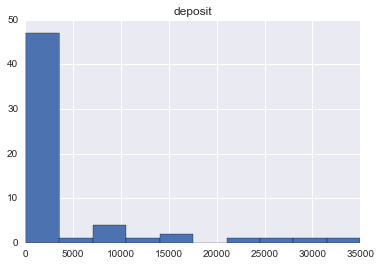

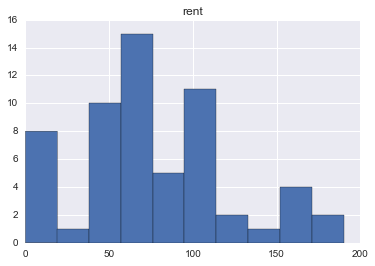

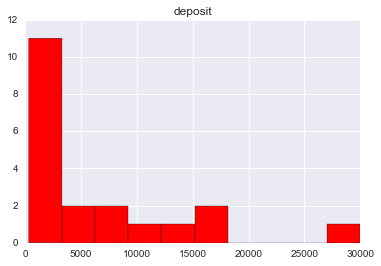

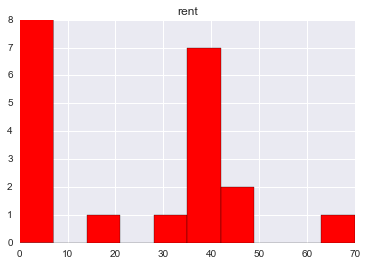

In [30]:
df_shinsa.hist("deposit")
df_shinsa.hist("rent")

df_shinlim.hist("deposit", color="Red")
df_shinlim.hist("rent", color="Red")

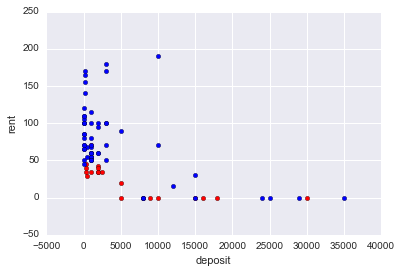

In [31]:
ax = df_shinlim.plot.scatter(x="deposit", y="rent", color="Red")
df_shinsa.plot.scatter(x="deposit", y="rent", color="Blue", ax=ax)